In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
df = pd.read_csv("data/agevsvotessummarized.csv")
df.head(50)

,Unnamed: 0,Prov/Terr,FED ID,Federal Electoral Districts_x,Total,Total Income,Under 20,20-24,25-29,30-34,...,40-44,45-49,50-54,55-59,60-64,65-69,70-74,Over 75,ï»¿Province,Party Won
0,0,10,10001.0,Avalon,72030,3.425814e+09,2670,4470,4880,5600,...,6110,6310,6800,6810,6620,6160,4340,5520,Newfoundland and Labrador,Liberal
1,1,10,10002.0,Bonavista--Burin--Trinity,64920,2.453784e+09,2330,3410,3100,3290,...,4560,5520,6220,6620,7400,6840,4980,6870,Newfoundland and Labrador,Liberal
2,2,10,10003.0,Coast of Bays--Central--Notre Dame,65130,2.458068e+09,2270,3520,3340,3450,...,4750,5700,6260,6670,6730,6470,4810,7320,Newfoundland and Labrador,Liberal
3,3,10,10004.0,Labrador,20830,1.169248e+09,930,1670,1980,1960,...,1950,2190,2020,1790,1480,1240,820,940,Newfoundland and Labrador,Liberal
4,4,10,10005.0,Long Range Mountains,77250,2.914423e+09,2560,4360,4220,4110,...,5400,6540,7660,8130,8390,7550,5480,8320,Newfoundland and Labrador,Liberal
5,5,10,10006.0,St. John's East,66670,3.668269e+09,2350,5180,5940,5830,...,5780,5890,5890,5680,5070,4430,3510,5420,Newfoundland and Labrador,Liberal
6,6,10,10007.0,St. John's South--Mount Pearl,66270,3.086318e+09,2390,4900,5750,5720,...,4930,5320,6290,6190,5800,4890,3600,5200,Newfoundland and Labrador,Liberal
7,7,11,11001.0,Cardigan,29970,1.237610e+09,1350,2250,2040,2090,...,2240,2460,2720,2810,2680,2630,1800,2690,Prince Edward Island,Liberal
8,8,11,11002.0,Charlottetown,29650,1.192487e+09,1250,2710,2550,2170,...,2070,2250,2430,2430,2550,2220,1710,3260,Prince Edward Island,Liberal
9,9,11,11003.0,Egmont,29310,1.079972e+09,1450,2110,1940,1820,...,2030,2310,2720,2800,2650,2500,1770,3280,Prince Edward Island,Liberal


In [4]:
Liberal = df.loc[df["Party Won"] == "Liberal"]
Liberal

,Unnamed: 0,Prov/Terr,FED ID,Federal Electoral Districts_x,Total,Total Income,Under 20,20-24,25-29,30-34,...,40-44,45-49,50-54,55-59,60-64,65-69,70-74,Over 75,ï»¿Province,Party Won
0,0,10,10001.0,Avalon,72030,3.425814e+09,2670,4470,4880,5600,...,6110,6310,6800,6810,6620,6160,4340,5520,Newfoundland and Labrador,Liberal
1,1,10,10002.0,Bonavista--Burin--Trinity,64920,2.453784e+09,2330,3410,3100,3290,...,4560,5520,6220,6620,7400,6840,4980,6870,Newfoundland and Labrador,Liberal
2,2,10,10003.0,Coast of Bays--Central--Notre Dame,65130,2.458068e+09,2270,3520,3340,3450,...,4750,5700,6260,6670,6730,6470,4810,7320,Newfoundland and Labrador,Liberal
3,3,10,10004.0,Labrador,20830,1.169248e+09,930,1670,1980,1960,...,1950,2190,2020,1790,1480,1240,820,940,Newfoundland and Labrador,Liberal
4,4,10,10005.0,Long Range Mountains,77250,2.914423e+09,2560,4360,4220,4110,...,5400,6540,7660,8130,8390,7550,5480,8320,Newfoundland and Labrador,Liberal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,332,59,59040.0,Vancouver South,84510,3.167996e+09,3330,7690,7710,6950,...,6520,7070,7550,7150,6280,5680,3660,8400,British Columba,Liberal
334,334,59,59042.0,West Vancouver--Sunshine Coast--Sea to Sky Cou...,98850,6.486246e+09,3380,7020,7570,7320,...,7460,8110,8310,8520,8290,7990,6450,11290,British Columba,Liberal
335,335,60,60001.0,Yukon,28700,1.570830e+09,1100,2010,2740,3010,...,2410,2330,2610,2860,2500,1870,1240,1420,Yukon,Liberal
336,336,61,61001.0,Northwest Territories,31890,1.890342e+09,1700,3120,3680,3520,...,2730,2890,3050,2720,1990,1400,850,1040,Northwest Territories,Liberal


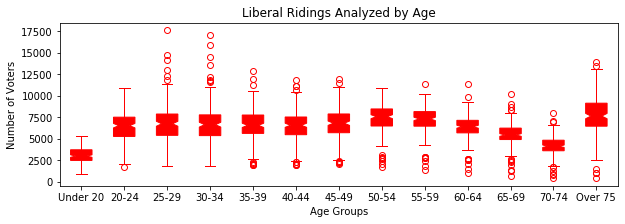

In [13]:
#fig=plt.figure(figsize=(8,3))
fig,ax = plt.subplots(figsize=(10,3))
box_plot_data=[Liberal["Under 20"], Liberal["20-24"], Liberal["25-29"], Liberal["30-34"],
               Liberal["35-39"],Liberal["40-44"],Liberal["45-49"], 
               Liberal["50-54"],Liberal["55-59"],Liberal["60-64"], 
               Liberal["65-69"],Liberal["70-74"],Liberal["Over 75"],
              ]
x_label_list = ["Under 20", "20-24", "25-29","30-34",
               "35-39","40-44","45-49", 
               "50-54","55-59","60-64", 
              "65-69","70-74","Over 75"]
ax.set_xticklabels(x_label_list)
c="red"
plt.boxplot(box_plot_data, notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c))
#ax.set_xlabel = "Age Groups"
#ax.set_ylabel = "Number of Voters"
#ax.set_title = "Liberal Ridings Analyzed by Age"
plt.xlabel("Age Groups")
plt.ylabel("Number of Voters")
plt.title("Liberal Ridings Analyzed by Age")
plt.savefig("./PNG_images_stats/Liberal_Age.png")
plt.show()

In [6]:
F, p = stats.f_oneway(Liberal["Under 20"], Liberal["20-24"], Liberal["25-29"], Liberal["30-34"],
               Liberal["35-39"],Liberal["40-44"],Liberal["45-49"], 
               Liberal["50-54"],Liberal["55-59"],Liberal["60-64"], 
               Liberal["65-69"],Liberal["70-74"],Liberal["Over 75"],
              )
p

2.0124259469929164e-196

In [7]:
Conservative = df.loc[df["Party Won"] == "Conservative"]
Conservative

,Unnamed: 0,Prov/Terr,FED ID,Federal Electoral Districts_x,Total,Total Income,Under 20,20-24,25-29,30-34,...,40-44,45-49,50-54,55-59,60-64,65-69,70-74,Over 75,ï»¿Province,Party Won
38,38,24,24007.0,Beauce,88070,3.340556e+09,4070,6080,6230,6640,...,6250,6240,7870,8500,7940,6900,5180,8900,Quebec,Conservative
39,39,24,24008.0,Beauport--Limoilou,77740,2.895465e+09,2340,5280,6590,6680,...,5100,4950,6440,7090,6630,6000,4920,9430,Quebec,Conservative
41,41,24,24010.0,Bellechasse--Les Etchemins--Lévis,95240,3.978108e+09,3830,6140,6290,6550,...,6480,6510,8210,9240,8810,8120,6570,11240,Quebec,Conservative
50,50,24,24019.0,Charlesbourg--Haute-Saint-Charles,86940,3.795622e+09,3370,5470,6180,6690,...,7030,6570,7420,7840,7030,6660,5810,9220,Quebec,Conservative
51,51,24,24020.0,Beauport--Côte-de-Beaupré--Île d’Orléans--Char...,78450,3.347711e+09,3390,4790,4720,5220,...,5550,5770,7350,8220,7790,6700,5070,7880,Quebec,Conservative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,308,59,59016.0,Langley--Aldergrove,93120,4.855046e+09,3990,7160,7010,7510,...,7610,8210,8430,8180,7270,6420,5000,8490,British Columba,Conservative
312,312,59,59020.0,North Okanagan--Shuswap,106070,4.539957e+09,3470,6280,6270,6720,...,6360,7000,8950,10800,10940,10360,8040,14440,British Columba,Conservative
316,316,59,59024.0,Prince George--Peace River--Northern Rockies,83840,4.293349e+09,3660,7310,8280,8470,...,6600,6880,7520,7820,6570,4900,3360,5190,British Columba,Conservative
317,317,59,59025.0,Richmond Centre,84820,3.345480e+09,2800,6930,7600,6520,...,6100,7570,8350,7980,7250,6380,4040,7610,British Columba,Conservative


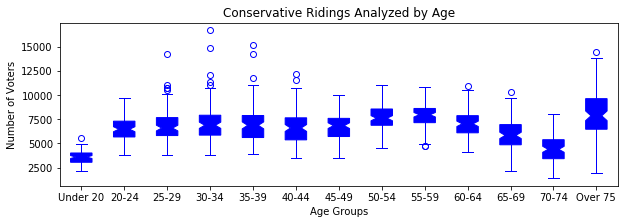

In [14]:
#fig=plt.figure(figsize=(8,3))
fig,ax = plt.subplots(figsize=(10,3))
box_plot_data=[Conservative["Under 20"], Conservative["20-24"], Conservative["25-29"], Conservative["30-34"],
               Conservative["35-39"],Conservative["40-44"],Conservative["45-49"], 
               Conservative["50-54"],Conservative["55-59"],Conservative["60-64"], 
               Conservative["65-69"],Conservative["70-74"],Conservative["Over 75"],
              ]
x_label_list = ["Under 20", "20-24", "25-29","30-34",
               "35-39","40-44","45-49", 
               "50-54","55-59","60-64", 
              "65-69","70-74","Over 75"]
ax.set_xticklabels(x_label_list)
c="blue"
plt.boxplot(box_plot_data, notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c))
#ax.set_xlabel = "Age Groups"
#ax.set_ylabel = "Number of Voters"
#ax.set_title = "Liberal Ridings Analyzed by Age"
plt.xlabel("Age Groups")
plt.ylabel("Number of Voters")
plt.title("Conservative Ridings Analyzed by Age")
plt.savefig("./PNG_images_stats/Conservative_Age.png")
plt.show()

In [72]:
F, p = stats.f_oneway(Conservative["Under 20"], Conservative["20-24"], Conservative["25-29"], Conservative["30-34"],
               Conservative["35-39"],Conservative["40-44"],Conservative["45-49"], 
               Conservative["50-54"],Conservative["55-59"],Conservative["60-64"], 
               Conservative["65-69"],Conservative["70-74"],Conservative["Over 75"]
              )
p

7.372849347481881e-120

In [16]:
NDP = df.loc[df["Party Won"] == "NDP"]
NDP

,Unnamed: 0,Prov/Terr,FED ID,Federal Electoral Districts_x,Total,Total Income,Under 20,20-24,25-29,30-34,...,40-44,45-49,50-54,55-59,60-64,65-69,70-74,Over 75,ï»¿Province,Party Won
32,32,24,24001.0,Abitibi--Baie-James--Nunavik--Eeyou,62830,2.472070e+09,3450,5670,5890,5310,...,5110,4990,5800,5970,4830,3830,2780,4060,Quebec,NDP
33,33,24,24002.0,Abitibi--Témiscamingue,83840,3.553223e+09,3730,6130,6230,6090,...,5710,5980,7800,8780,7860,6380,4790,8090,Quebec,NDP
42,42,24,24011.0,Beloeil--Chambly,93070,4.730364e+09,3900,6380,6230,7370,...,8130,7740,8820,8560,7210,6550,5260,7930,Quebec,NDP
43,43,24,24012.0,Berthier--Maskinongé,86630,3.128449e+09,3110,5180,5370,5690,...,5620,6030,8270,9350,9000,7710,6110,8810,Quebec,NDP
49,49,24,24018.0,Rimouski-Neigette--Témiscouata--Les Basques,71590,2.706354e+09,2640,4430,4350,4310,...,4430,4390,6100,7570,7790,6750,5050,8860,Quebec,NDP
56,56,24,24025.0,Drummond,83520,3.059781e+09,3650,5630,5880,5980,...,6270,6000,7240,7880,7480,6830,5280,8140,Quebec,NDP
59,59,24,24028.0,Hochelaga,84010,3.117228e+09,1850,5900,9230,9380,...,6640,5970,6500,6620,6030,4810,3910,8090,Quebec,NDP
63,63,24,24032.0,Jonquière,73300,3.009821e+09,2680,4640,5100,5360,...,5130,4770,6480,7900,7530,6060,4670,6940,Quebec,NDP
70,70,24,24039.0,Laurier--Sainte-Marie,92870,3.960077e+09,1470,7620,14150,12990,...,7710,6250,6520,6300,5600,4670,3300,5510,Quebec,NDP
74,74,24,24043.0,Longueuil--Saint-Hubert,87920,3.881470e+09,2990,6420,6660,6510,...,6830,6570,7810,8480,7500,6450,5370,9140,Quebec,NDP


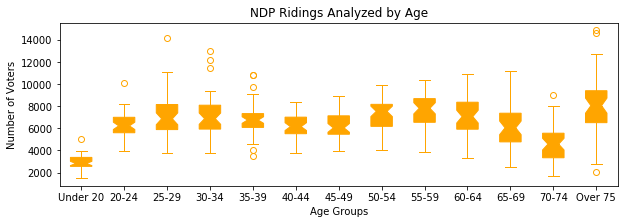

In [17]:
#fig=plt.figure(figsize=(8,3))
fig,ax = plt.subplots(figsize=(10,3))
box_plot_data=[NDP["Under 20"], NDP["20-24"], NDP["25-29"], NDP["30-34"],
               NDP["35-39"],NDP["40-44"],NDP["45-49"], 
               NDP["50-54"],NDP["55-59"],NDP["60-64"], 
               NDP["65-69"],NDP["70-74"],NDP["Over 75"],
              ]
x_label_list = ["Under 20", "20-24", "25-29","30-34",
               "35-39","40-44","45-49", 
               "50-54","55-59","60-64", 
              "65-69","70-74","Over 75"]
ax.set_xticklabels(x_label_list)
c="orange"
plt.boxplot(box_plot_data, notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c))
#ax.set_xlabel = "Age Groups"
#ax.set_ylabel = "Number of Voters"
#ax.set_title = "Liberal Ridings Analyzed by Age"
plt.xlabel("Age Groups")
plt.ylabel("Number of Voters")
plt.title("NDP Ridings Analyzed by Age")
plt.savefig("./PNG_images_stats/NDP_Age.png")
plt.show()

In [18]:
F, p = stats.f_oneway(NDP["Under 20"], NDP["20-24"], NDP["25-29"], NDP["30-34"],
               NDP["35-39"],NDP["40-44"],NDP["45-49"], 
               NDP["50-54"],NDP["55-59"],NDP["60-64"], 
               NDP["65-69"],NDP["70-74"],NDP["Over 75"]
              )
p

5.221104675839071e-54

In [22]:
Green = df.loc[df["Party Won"] == "Green Party"]
Green

,Unnamed: 0,Prov/Terr,FED ID,Federal Electoral Districts_x,Total,Total Income,Under 20,20-24,25-29,30-34,...,40-44,45-49,50-54,55-59,60-64,65-69,70-74,Over 75,ï»¿Province,Party Won
319,319,59,59027.0,Saanich--Gulf Islands,89630,4.810525e+09,2970,5980,4960,4690,...,5100,5960,6970,8150,9040,9310,7290,14330,British Columba,Green Party


KeyError: 0

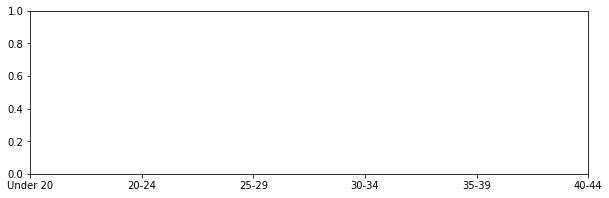

In [23]:

#fig=plt.figure(figsize=(8,3))
fig,ax = plt.subplots(figsize=(10,3))
box_plot_data=[Green["Under 20"], Green["20-24"], Green["25-29"], Green["30-34"],
               Green["35-39"],Green["40-44"],Green["45-49"], 
               Green["50-54"],Green["55-59"],Green["60-64"], 
               Green["65-69"],Green["70-74"],Green["Over 75"],
              ]
x_label_list = ["Under 20", "20-24", "25-29","30-34",
               "35-39","40-44","45-49", 
               "50-54","55-59","60-64", 
              "65-69","70-74","Over 75"]
ax.set_xticklabels(x_label_list)
c="green"
plt.boxplot(box_plot_data, notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c))
#ax.set_xlabel = "Age Groups"
#ax.set_ylabel = "Number of Voters"
#ax.set_title = "Liberal Ridings Analyzed by Age"
plt.xlabel("Age Groups")
plt.ylabel("Number of Voters")
plt.title("Green Ridings Analyzed by Age")
plt.savefig("./PNG_images_stats/Green_Age.png")
plt.show()

In [24]:
F, p = stats.f_oneway(Green["Under 20"], Green["20-24"], Green["25-29"], Green["30-34"],
               Green["35-39"],Green["40-44"],Green["45-49"], 
               Green["50-54"],Green["55-59"],Green["60-64"], 
               Green["65-69"],Green["70-74"],Green["Over 75"],
              )
p

nan

In [25]:
Bloc = df.loc[df["Party Won"] == "Bloc QuÃ©bÃ©cois"]
Bloc

,Unnamed: 0,Prov/Terr,FED ID,Federal Electoral Districts_x,Total,Total Income,Under 20,20-24,25-29,30-34,...,40-44,45-49,50-54,55-59,60-64,65-69,70-74,Over 75,ï»¿Province,Party Won
40,40,24,24009.0,Bécancour--Nicolet--Saurel,78150,2.962666e+09,2700,4590,4780,4800,...,4760,5200,6730,8090,8200,7220,5990,9510,Quebec,Bloc QuÃ©bÃ©cois
45,45,24,24014.0,Pierre-Boucher--Les Patriotes--Verchères,81490,4.596476e+09,3420,5770,5330,5710,...,6530,6860,7990,8080,7070,5970,4890,7200,Quebec,Bloc QuÃ©bÃ©cois
62,62,24,24031.0,Joliette,87230,3.169174e+09,2950,5500,5370,5440,...,5470,5730,7760,9300,9100,8070,6500,10210,Quebec,Bloc QuÃ©bÃ©cois
64,64,24,24033.0,La Pointe-de-l'Île,85660,3.261445e+09,2570,6110,6550,6640,...,6450,6530,8090,8910,7710,5790,4570,8620,Quebec,Bloc QuÃ©bÃ©cois
77,77,24,24046.0,Manicouagan,73830,3.119627e+09,3020,4880,5040,5080,...,5540,5900,7570,7880,6940,5420,4180,6840,Quebec,Bloc QuÃ©bÃ©cois
79,79,24,24048.0,Mirabel,92340,4.015025e+09,3980,6780,7790,8730,...,8720,8340,8890,8360,6520,5410,3850,5000,Quebec,Bloc QuÃ©bÃ©cois
81,81,24,24050.0,Montcalm,85940,3.376771e+09,3320,6410,7430,7350,...,7290,7080,8340,8080,6730,5670,4330,5890,Quebec,Bloc QuÃ©bÃ©cois
91,91,24,24060.0,Repentigny,94060,4.253844e+09,3840,7080,6240,6340,...,7450,7490,9030,9680,8160,6840,5540,8800,Quebec,Bloc QuÃ©bÃ©cois
94,94,24,24063.0,Rivière-du-Nord,91420,3.548132e+09,3310,6540,7130,6810,...,6680,7000,8560,8950,8050,6820,5600,8730,Quebec,Bloc QuÃ©bÃ©cois
106,106,24,24075.0,Terrebonne,87380,3.933249e+09,3950,6890,5950,6660,...,8650,8070,8850,8380,6680,5340,4210,5390,Quebec,Bloc QuÃ©bÃ©cois


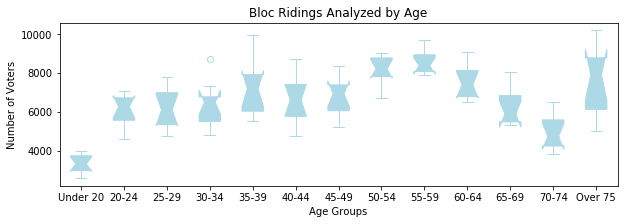

In [26]:
fig,ax = plt.subplots(figsize=(10,3))
box_plot_data=[Bloc["Under 20"], Bloc["20-24"], Bloc["25-29"], Bloc["30-34"],
               Bloc["35-39"],Bloc["40-44"],Bloc["45-49"], 
               Bloc["50-54"],Bloc["55-59"],Bloc["60-64"], 
               Bloc["65-69"],Bloc["70-74"],Bloc["Over 75"],
              ]
x_label_list = ["Under 20", "20-24", "25-29","30-34",
               "35-39","40-44","45-49", 
               "50-54","55-59","60-64", 
              "65-69","70-74","Over 75"]
ax.set_xticklabels(x_label_list)
c="lightblue"
plt.boxplot(box_plot_data, notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c))
#ax.set_xlabel = "Age Groups"
#ax.set_ylabel = "Number of Voters"
#ax.set_title = "Liberal Ridings Analyzed by Age"
plt.xlabel("Age Groups")
plt.ylabel("Number of Voters")
plt.title("Bloc Ridings Analyzed by Age")
plt.savefig("./PNG_images_stats/Bloc_Age.png")
plt.show()

In [97]:
F, p = stats.f_oneway(Bloc["Under 20"], Bloc["20-24"], Bloc["25-29"], Bloc["30-34"],
               Bloc["35-39"],Bloc["40-44"],Bloc["45-49"], 
               Bloc["50-54"],Bloc["55-59"],Bloc["60-64"], 
               Bloc["65-69"],Bloc["70-74"],Bloc["Over 75"]
              )
p

2.237318874490858e-20